In [1]:
import json
import random
import sys
from typing import Dict, List

import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(1, '../../src')

from ce.algorithms.greedy_heuristics import random_solution
from ce.algorithms.local_search import greedy_local_search, two_edges_neighborhood
from ce.algorithms.global_convexity.similarity import calculate_avg_similarity, calculate_similarities, edge_similarity, node_similarity
from ce.tsp import create_tsp, TSP
from ce.utils.experiments import experiment, quality_plots
from scipy.stats import pearsonr

# Global convexity (fitness-distance/similarity correlations)

**Nina Zukowska 148278, Antoni Solarski 148270**

In [2]:
problem_instance_A_path = '../../data/TSPA.csv'
problem_instance_B_path = '../../data/TSPB.csv'
problem_instance_C_path = '../../data/TSPC.csv'
problem_instance_D_path = '../../data/TSPD.csv'

In [3]:
tspa = create_tsp(problem_instance_A_path)
tspb = create_tsp(problem_instance_B_path)
tspc = create_tsp(problem_instance_C_path)
tspd = create_tsp(problem_instance_D_path)

## Algorithms

---

```python
    # TODO
```

---

## Experiments

In [4]:
def generate_solutions(tsp: TSP, n_solutions: int) -> List[List[int]]:
    return [
        greedy_local_search(tsp, random_solution(tsp), two_edges_neighborhood)[0]
        for _ in range(n_solutions)
    ]

In [5]:
def get_costs(tsp: TSP, solutions: List[List[int]]) -> List[int]:
    return [tsp.get_solution_cost(s) for s in solutions]

In [6]:
def get_to_best_similarities(best_solution: List[int], solutions: List[List[int]]) -> Dict[str, List[float]]:
    return {
        "nodes": calculate_similarities(best_solution, solutions, node_similarity),
        "edges": calculate_similarities(best_solution, solutions, edge_similarity),
    }

In [7]:
def get_avg_similarities(solutions: List[List[int]]) -> Dict[str, List[float]]:
    return {
        "nodes": [calculate_avg_similarity(s, solutions, node_similarity) for s in solutions],
        "edges": [calculate_avg_similarity(s, solutions, edge_similarity) for s in solutions],
    }

In [21]:
def plot(costs: List[int], similarities: Dict[str, List[float]]):
    num_plots = len(similarities)
    fig, axs = plt.subplots(1, len(similarities), figsize=(8 * num_plots, 8))

    for i, (t, s) in enumerate(similarities.items()):
        axs[i].title.set_text(t)
        axs[i].scatter(costs, s)
        correlation_coefficient, p_value = pearsonr(costs, s)
        print(f"Correlation for {t}")
        print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
        print(f"P-value: {p_value}")
        print(f"Correlation present? {p_value < 0.05}")

    plt.show()

In [22]:
n_solutions = 5

---

### Instance C

In [23]:
with open('../report_7/best_solutions_c.json', 'r', encoding='utf-8') as f:
    c_best_solution = json.load(f)[1]

tspc.get_solution_cost(c_best_solution)

47259.0

In [24]:
%%time
random.seed(13)
np.random.seed(13)

c_solutions = generate_solutions(tspc, n_solutions)

CPU times: total: 9.58 s
Wall time: 9.63 s


In [25]:
c_costs = get_costs(tspc, c_solutions)
min(c_costs), sum(c_costs) / len(c_costs), max(c_costs)

(51561.0, 52186.0, 53332.0)

In [26]:
c_to_best_similarities = get_to_best_similarities(c_best_solution, c_solutions)
c_avg_similarities = get_avg_similarities(c_solutions)

##### Similarities to the best solution

Correlation for nodes
Pearson Correlation Coefficient: -0.5250855005587642
P-value: 0.36357801460762185
Correlation present? False
Correlation for edges
Pearson Correlation Coefficient: 0.32976590204442624
P-value: 0.5878680867091318
Correlation present? False


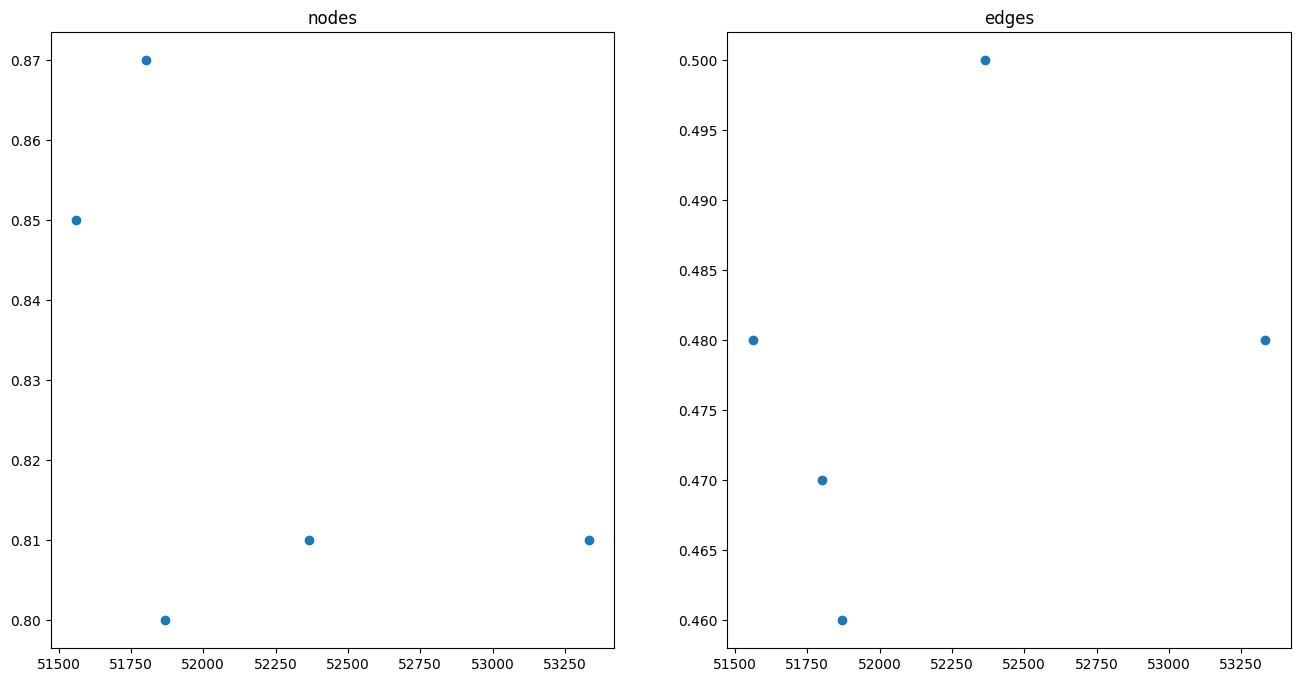

In [27]:
plot(c_costs, c_to_best_similarities)

---

##### Average Similarities to other solutions

Correlation for nodes
Pearson Correlation Coefficient: -0.15377496350566425
P-value: 0.8049820377174064
Correlation present? False
Correlation for edges
Pearson Correlation Coefficient: 0.5653499634562595
P-value: 0.3206076334535428
Correlation present? False


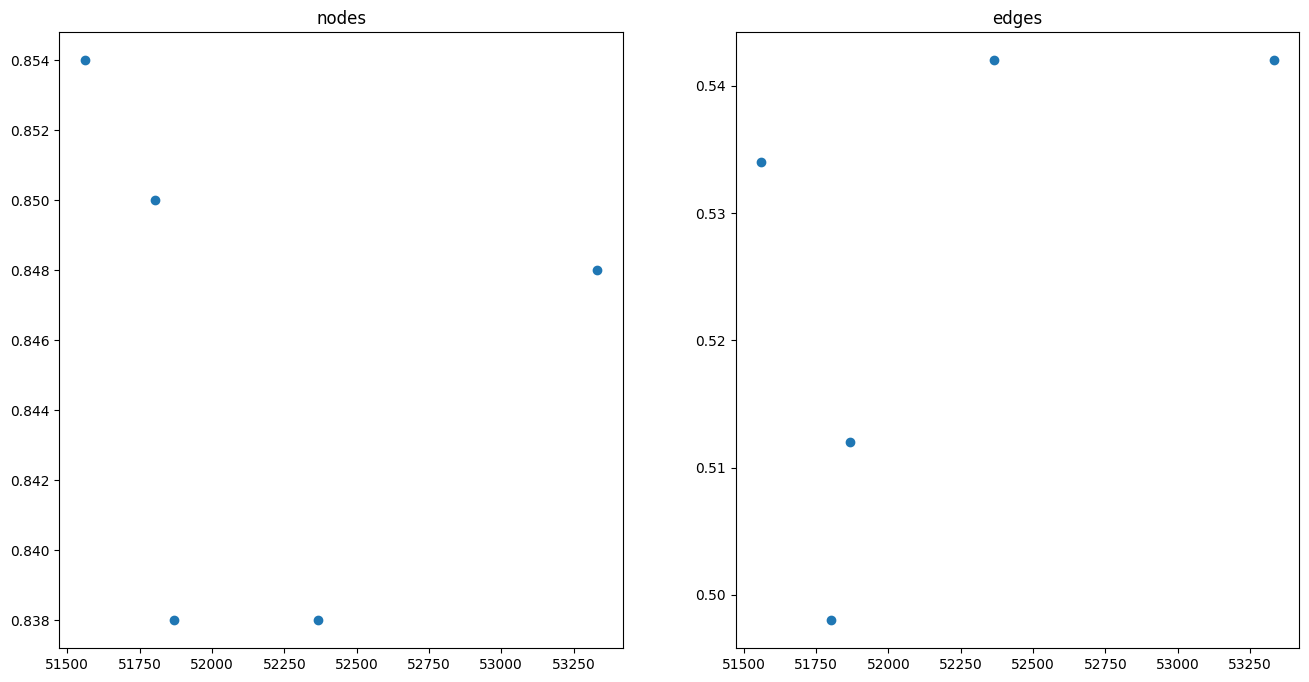

In [28]:
plot(c_costs, c_avg_similarities)

---

In [80]:
with open('c_costs.json', 'w', encoding='utf-8') as f:
    json.dump(c_costs, f, ensure_ascii=False, indent=4)
with open('c_to_best_similarities.json', 'w', encoding='utf-8') as f:
    json.dump(c_to_best_similarities, f, ensure_ascii=False, indent=4)
with open('c_avg_similarities.json', 'w', encoding='utf-8') as f:
    json.dump(c_avg_similarities, f, ensure_ascii=False, indent=4)

---

## Conclusions

TODO